In [1]:
ls

Position_Salaries.csv  SVR.ipynb


In [2]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Importing dataset
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

In [4]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [5]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [6]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y =  sc_y.fit_transform( y.reshape(-1,1) )

/home/prakash/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
#Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,y)


/home/prakash/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [8]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))

In [9]:
y_pred

array([170370.0204065])

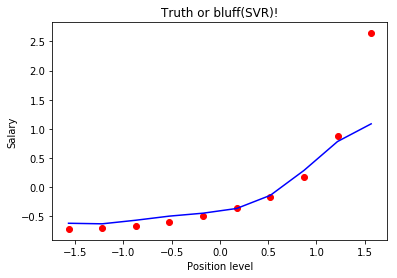

In [10]:
#Visualizing the SVR results
plt.scatter(X,y,color='red')
plt.plot(X,regressor.predict(X),color='blue')
plt.title('Truth or bluff(SVR)!')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
##We may get wrong one, due to different scaling(without feature scaling)

In [11]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])